In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

In [2]:
#reding the data for Electric conductivity in 2022
#df_EC22 = pd.read_csv("Merging\Leitfähigkeit\pH_2022.csv", encoding = 'unicode_escape', sep = ';')
#Removing the forth useless col
#del df_pH22["Unnamed: 3"]
#Replace the non-number values with NaN
#df_pH22['pH_Wert'].replace(['I','W','F','S','FW','FU','FWU','WU','WB',
#                                           'UW','U','UN','UB','FB','IU','SU','BU','X','WN','SN',
#                                          'FN','FUN','WUN','XN','FBN','KWN','NU','WNU','FNU','FWNU','SNU',
#                                           'XNU','BNU','BN','FWN','KN'], np.nan, inplace=True)
#Replace the comma in with dot for decimals to be able to change them to float later
#df_pH22['pH_Wert'] = df_pH22['pH_Wert'].str.replace(',','.')
#Change the date and time format to date time
#df_pH22['Datum'] = pd.to_datetime(df_pH22['Datum'], format='%Y-%m-%d', errors='coerce', utc = True).dt.date
#df_pH22['Uhrzeit'] = pd.to_datetime(df_pH22['Uhrzeit'], format='%H:%M', errors='coerce').dt.time
#df_pH22

In [3]:
#Reading the date for pH 1988_2004
df_ec21_1st = pd.read_csv("Merging\Leitfähigkeit\Leitfaehigkeit_1988bis2004.csv", encoding = 'unicode_escape', sep = ';')
#Replace the comma in with dot for decimals to be able to change them to float later
df_ec21_1st['Leitfähigkeit_[MikroS/cm]'] = df_ec21_1st['Leitfähigkeit_[MikroS/cm]'].str.replace(',','.')
#Change the date and time format to date time
df_ec21_1st['Datum'] = pd.to_datetime(df_ec21_1st['Datum'], format='%Y-%m-%d', errors='coerce', utc = True).dt.date
df_ec21_1st['Uhrzeit'] = pd.to_datetime(df_ec21_1st['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
df_ec21_1st

,Datum,Uhrzeit,Leitfähigkeit_[MikroS/cm]
0,1988-06-19,01:00:00,1063
1,1988-06-19,01:05:00,1064
2,1988-06-19,01:10:00,1065
3,1988-06-19,01:15:00,1065
4,1988-06-19,01:20:00,1065
...,...,...,...
802228,2004-12-31,23:10:00,983.5
802229,2004-12-31,23:20:00,985.7
802230,2004-12-31,23:30:00,982.2
802231,2004-12-31,23:40:00,978.9


In [4]:
#Reading the date for pH 2005_2021
df_ec21_2nd = pd.read_csv("Merging\Leitfähigkeit\Leitfaehigkeit_2005bis2021.csv", encoding = 'unicode_escape', sep = ';')
#Replace the comma in with dot for decimals to be able to change them to float later
df_ec21_2nd['Leitfähigkeit_[MikroS/cm]'] = df_ec21_2nd['Leitfähigkeit_[MikroS/cm]'].str.replace(',','.')
#Change the date and time format to date time
df_ec21_2nd['Datum'] = pd.to_datetime(df_ec21_2nd['Datum'], format='%Y-%m-%d', errors='coerce', utc = True).dt.date
df_ec21_2nd['Uhrzeit'] = pd.to_datetime(df_ec21_2nd['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
df_ec21_2nd

,Datum,Uhrzeit,Leitfähigkeit_[MikroS/cm]
0,2005-01-01,00:00:00,NaN
1,2005-01-01,00:10:00,NaN
2,2005-01-01,00:20:00,NaN
3,2005-01-01,00:30:00,NaN
4,2005-01-01,00:40:00,NaN
...,...,...,...
825349,2021-12-31,23:10:00,965.2
825350,2021-12-31,23:20:00,965.4
825351,2021-12-31,23:30:00,965.9
825352,2021-12-31,23:40:00,966.6


In [5]:
#Appending the dataframes
df_ec = pd.concat([df_ec21_1st, df_ec21_2nd], ignore_index = True)
df_ec

,Datum,Uhrzeit,Leitfähigkeit_[MikroS/cm]
0,1988-06-19,01:00:00,1063
1,1988-06-19,01:05:00,1064
2,1988-06-19,01:10:00,1065
3,1988-06-19,01:15:00,1065
4,1988-06-19,01:20:00,1065
...,...,...,...
1627582,2021-12-31,23:10:00,965.2
1627583,2021-12-31,23:20:00,965.4
1627584,2021-12-31,23:30:00,965.9
1627585,2021-12-31,23:40:00,966.6


In [6]:
#Summary and formatting str to float, and change type to datetime:
df_ec['Leitfähigkeit_[MikroS/cm]']=df_ec['Leitfähigkeit_[MikroS/cm]'].astype(float)
df_ec['Datum'] = pd.to_datetime(df_ec['Datum'])
df_ec.info()
#Exporting to csv file
df_ec.to_csv('Merging\Leitfähigkeit\O1988_2021.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627587 entries, 0 to 1627586
Data columns (total 3 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Datum                      1627587 non-null  datetime64[ns]
 1   Uhrzeit                    1627587 non-null  object        
 2   Leitfähigkeit_[MikroS/cm]  1497018 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 37.3+ MB


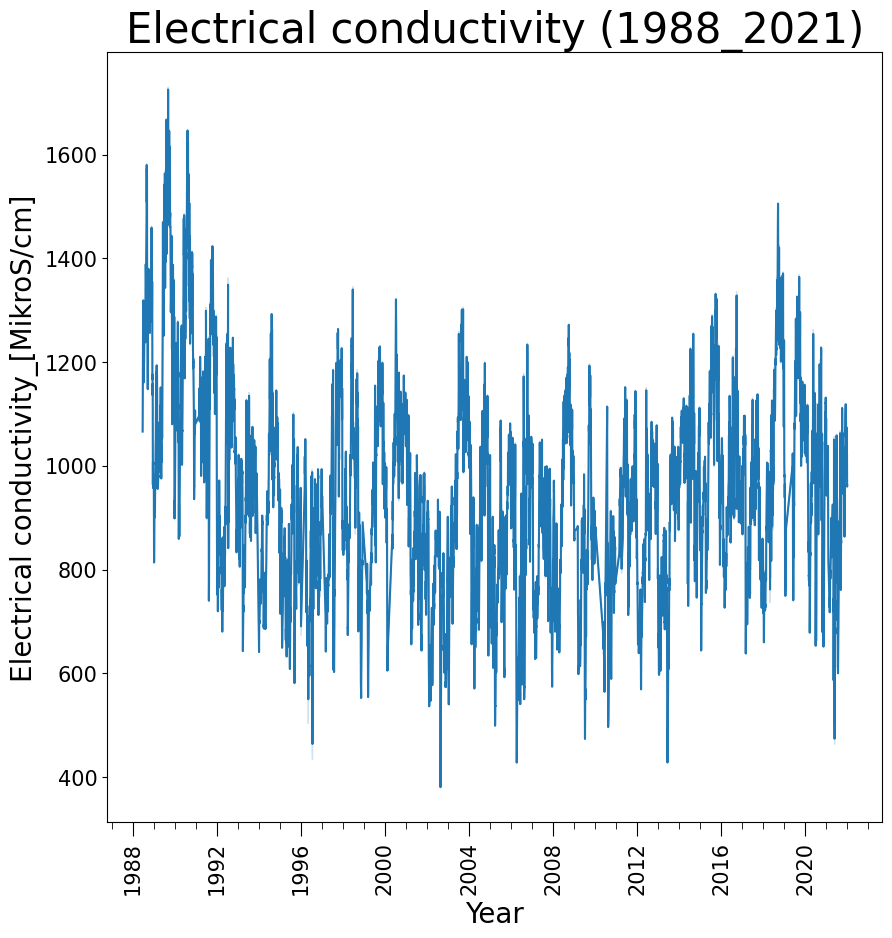

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
fig = sns.lineplot(data = df_ec, x='Datum', y='Leitfähigkeit_[MikroS/cm]')
fig.axes.set_title("Electrical conductivity (1988_2021)",fontsize=30)
fig.set_xlabel("Year",fontsize=20)
fig.set_ylabel("Electrical conductivity_[MikroS/cm]",fontsize=20)
fig.tick_params(labelsize=15)
import matplotlib.dates as md
# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.YearLocator(4))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.YearLocator())
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)
plt.show()